<a href="https://colab.research.google.com/github/Cheruugit/EDA_PracticeProjects/blob/main/Comprehensive_EDA_on_a_real_House_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction/Problem Statement**

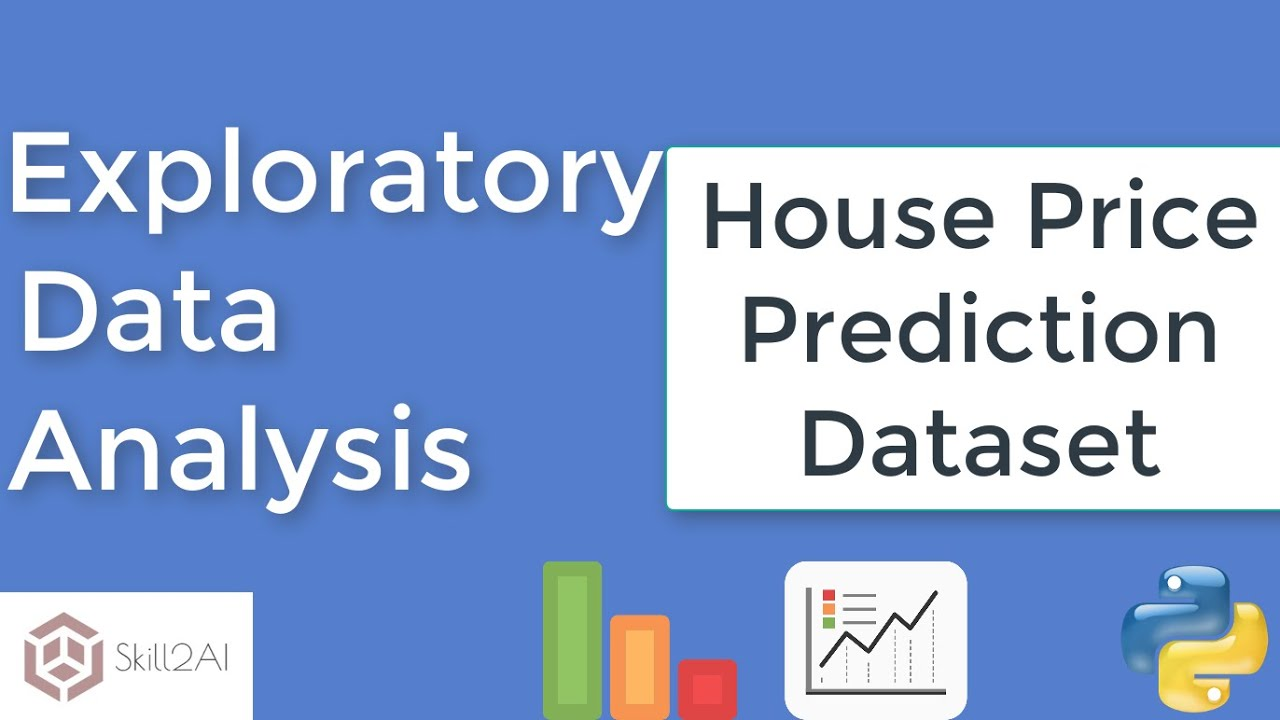
In this project, our central aim is to construct a predictive model capable of accurately forecasting the sale prices of houses. In this notebook we begin with a meticulous exploration of our dataset(EDA). We endeavor to uncover the factors that influence housing prices beyond conventional considerations, such as the number of bedrooms or the presence of a charming white-picket fence.

As we navigate through the 81 explanatory variables detailing various aspects of residential homes in Ames, Iowa, we pose fundamental questions:  

*   Do these variables align with our conception of an ideal home?  
*   Are they pivotal in our decision-making process when purchasing a property?

Through this introspective journey, we delve into the significance of each variable—evaluating the impact of each attribute on sale prices.

Moreover, we scrutinize whether certain variables redundantly convey information already encapsulated within others. By filtering our dataset and focusing on variables with 'High' 'Expectation', we aim to distill meaningful insights that will underpin the development of our predictive model.

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [169]:
train= pd.read_csv('/content/train (1).csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [170]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [171]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# EXPLORATORY DATA ANALYSIS.

## Sale Price Distribution

In [ ]:
train['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

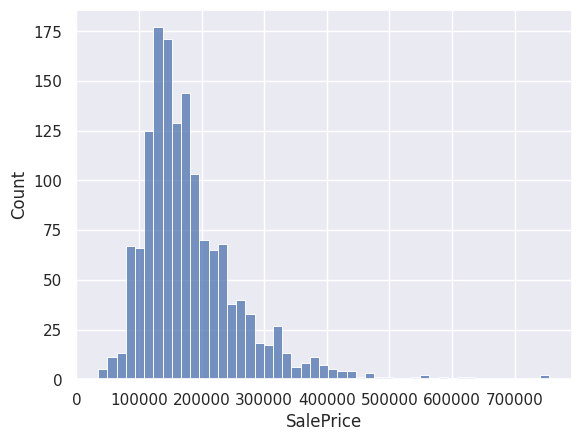

In [ ]:
#histogram
sns.histplot(train['SalePrice']);

**Insight:**

From the histogram we can see that the distribution deviates from the normal distribution.Has positive skewdness and shows peakedness.

<ipython-input-173-57f8a3fe5c57>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


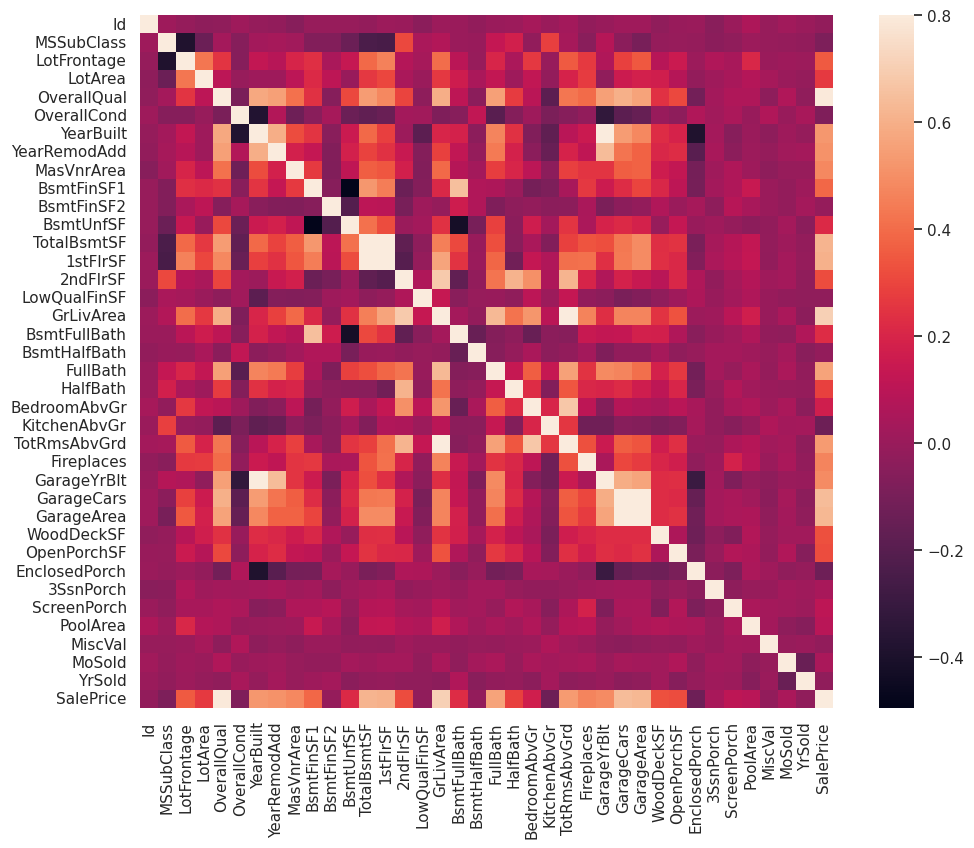

In [173]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**Insight:**

At first glance it's clear that there are multiple white squares ."Garage Area" and "GarageCars" are the first variables and the strong correlation implies multicollinearity,considering that as the garage area increases, there's a tendency for the number of cars to increase as well.

The second variables  'YearBuilt' and 'GarageYrBlt', we can conclude that they give almost the same information. The third and foth variables 'TotRmsAbvGrd' and 'GrLivArea' ,'TotalBsmtSF' and '1stFlrSF' also have multicollinearity  because they represent similar aspects of the house's size and space exception of bunkers.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.



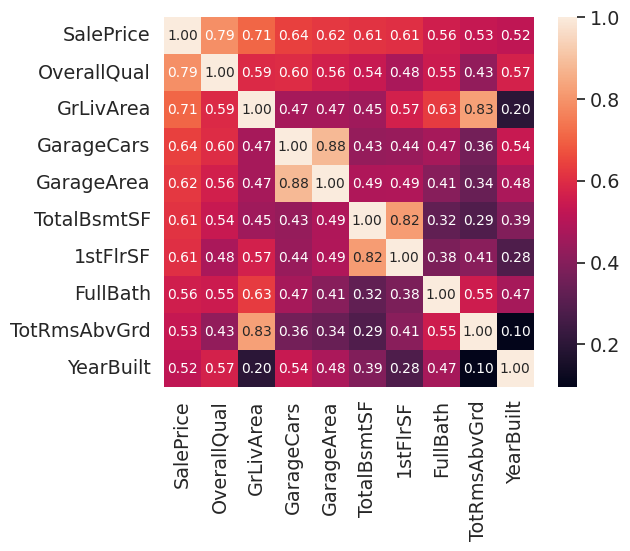

In [174]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Insight:**

OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.

'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right.

'FullBath'?? Really? Yes!
"FullBath' and 'SalePrice' seem to be in cahoots! More full bathrooms, more cha-ching! 🚽💰

'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.

Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.Let's dig deeper into that time capsule in the next part.

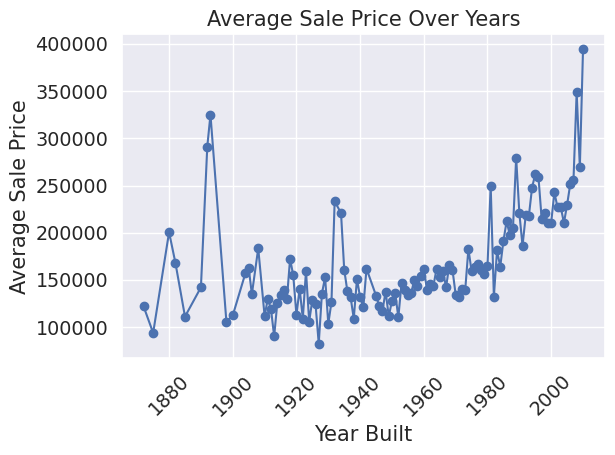

In [175]:
average_prices = train.groupby('YearBuilt')['SalePrice'].mean()

plt.plot(average_prices.index, average_prices.values, marker='o', linestyle='-')
plt.title('Average Sale Price Over Years')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Show gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


**Insight:**

Looks like vintage charm is taking a backseat to modern flair in the real estate race! Old houses are getting outshined by their newer, trendier rivals. Time for those historic beauties to consider a makeover, perhaps?

**Note:** *We don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so that prices are comparable over the years.*

## Scatter plots between 'SalePrice' and correlated variable

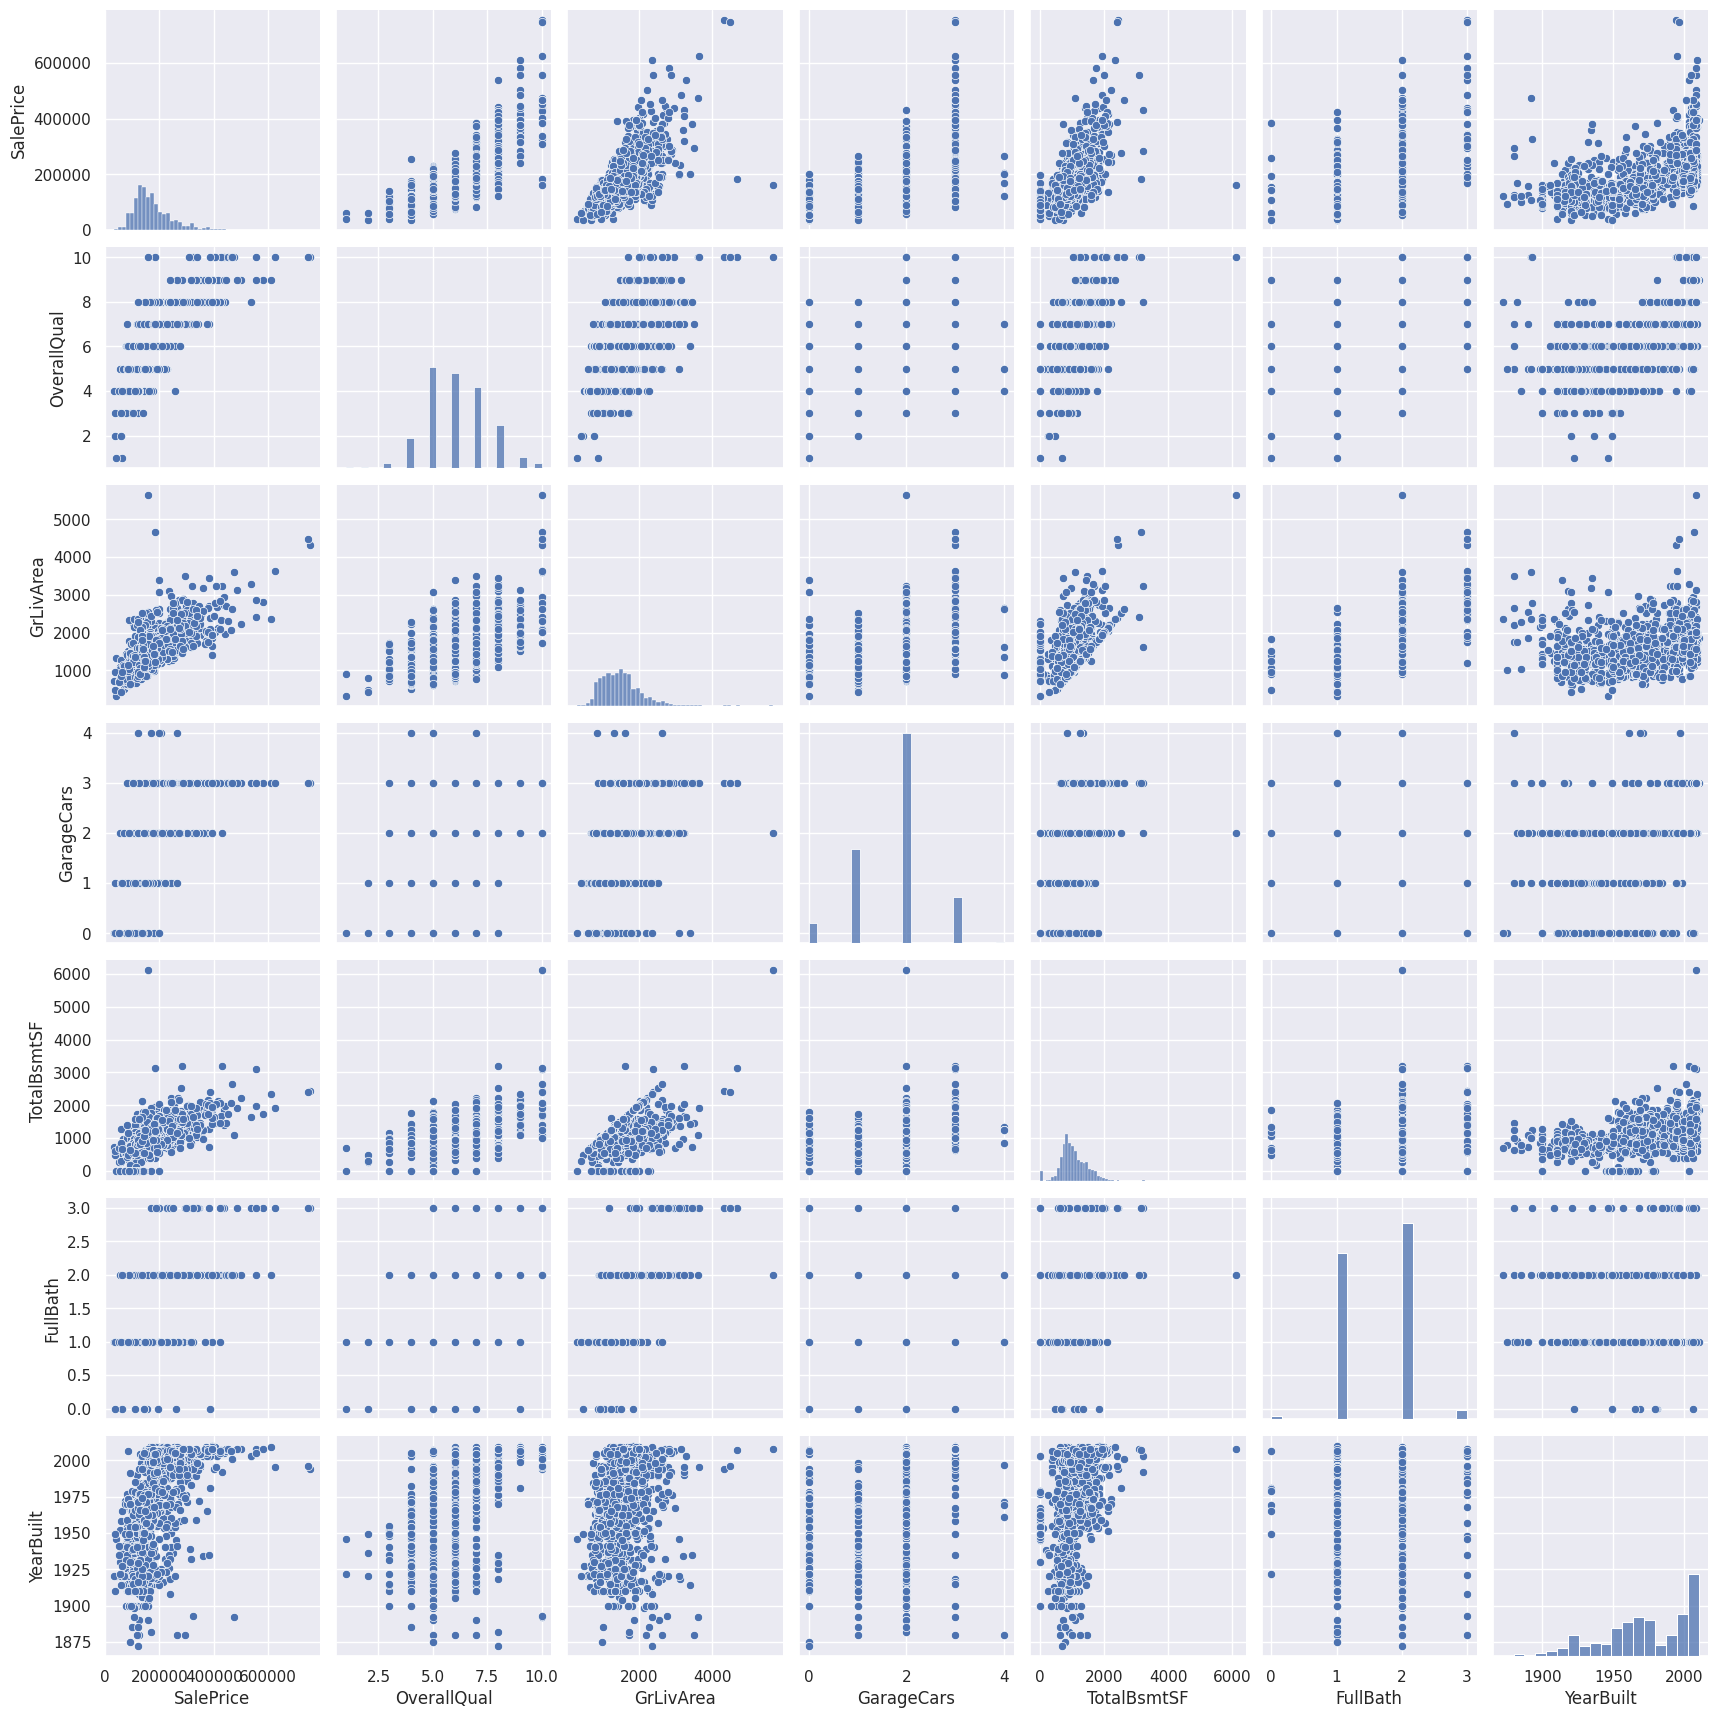

In [176]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

**Insight:**

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It's evident that in most cases, the basement area of a house is smaller than the above ground living space, forming a pattern that resembles a boundary line. This linear trend suggests a consistent relationship between the two areas. Additionally, while the majority of data points fall below this line, indicating typical house configurations, there are occasional outliers where the basement area surpasses the above ground living space, hinting at unconventional features like underground bunkers

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. The plot shows an interesting trend, towards the bottom of the data points, there's a subtle but noticeable rise resembling an exponential function. On the flip side, at the upper end of the data points, there's a distinct upward curve suggesting a different pattern.

Moreover, if we focus on the recent years, we see a cluster of data points consistently above this upper trend line. This indicates a faster increase in prices compared to previous years.


**Time to tackle the missing data**

In [177]:
# Calculate total missing values for each column
total = train.isnull().sum()

# Calculate percentage of missing values for each column
percent = (total / len(train)) * 100

# Create a DataFrame to store the total and percentage of missing values
missing_data = pd.DataFrame({'Total': total, 'Percent': percent})

# Sort the DataFrame by the total number of missing values in descending order
missing_data = missing_data.sort_values(by='Total', ascending=False)

# Display the top 20 columns with missing values
missing_data.head(20)


,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


**Insight:**

To handle missing data, we'll follow a simple approach: if more than 15% of the data is missing for a variable, we'll delete that variable altogether. This applies to 'PoolQC', 'MiscFeature', 'Alley', and similar variables. Honestly, these aren't typically deal-breakers when it comes to buying a house, right? Plus, some of them might even be outliers!

Now, for variables like 'GarageX' and 'BsmtX' where the missing data is around 5%, we'll drop those specific variables. Why? Because we have 'GarageCars' and other crucial info already.

As for 'MasVnrArea' and 'MasVnrType', while they're not vital, they do correlate with 'YearBuilt' and 'OverallQual', which we're already considering. So, let's drop them too.

Lastly, 'Electrical' has just one missing observation. We'll remove that observation but keep the variable. So, in a nutshell, we're cleaning house by removing the missing data, keeping what matters, and ensuring our analysis is on point!

In [178]:
#dealing with missing data
#train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
# Drop columns with more than 1 missing value
train = train.drop(columns=(missing_data[missing_data['Total'] > 1]).index)

train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() #just checking that there's no missing data missing...*/

0

**Relationship with numeric variables**

Text(0.5, 1.0, 'Ground Living Area vs SalePrice')

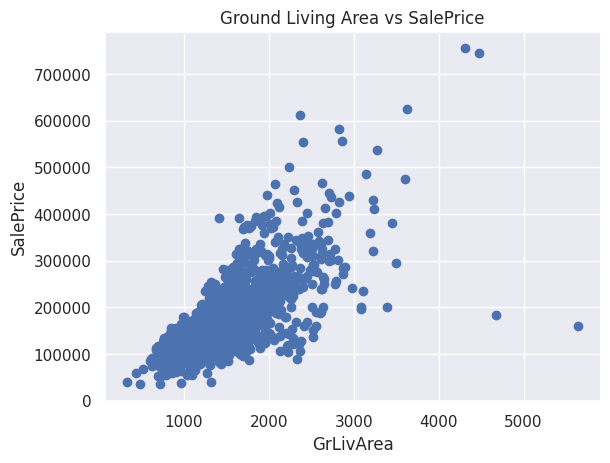

In [181]:
#GrLivArea: Above grade (ground) living area square feet
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Ground Living Area vs SalePrice')


**Insight:**

There is a linear relationship between sale price and ground living area.

The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

In [182]:
# Sort the DataFrame by 'GrLivArea' in descending order and select the first two rows
# This aims to identify the two data points with the highest 'GrLivArea' values
top_2_largest = train.sort_values(by='GrLivArea', ascending=False)[:2]
top_2_largest

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [183]:
# Drop the rows with 'Id' equal to 1299 from the DataFrame
# This removes the data points identified in the previous step
train = train.drop(train[train['Id'] == 1299].index)

# Drop the rows with 'Id' equal to 524 from the DataFrame
# This removes another data point identified in the previous step
train = train.drop(train[train['Id'] == 524].index)

Text(0.5, 1.0, 'Ground Living Area vs SalePrice')

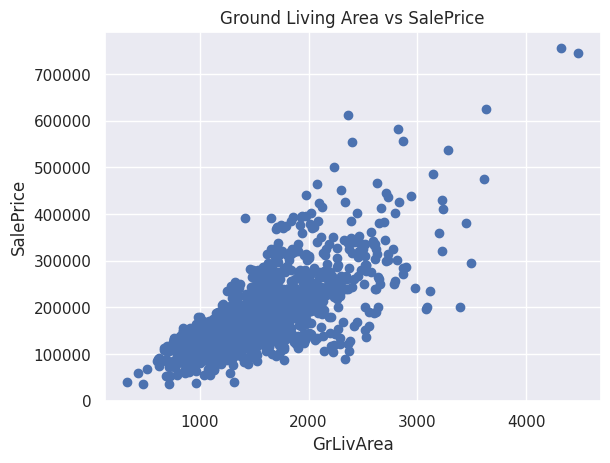

In [184]:
#GrLivArea: Above grade (ground) living area square feet
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Ground Living Area vs SalePrice')


Text(0.5, 1.0, 'Sale Price vs square feet of basement area')

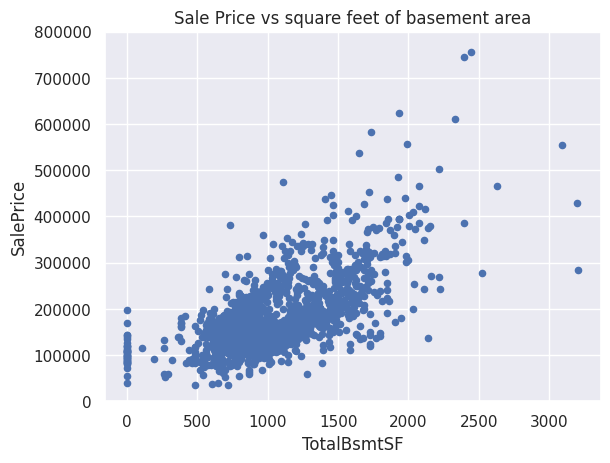

In [185]:
#Total square feet of basement area
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.title('Sale Price vs square feet of basement area')



It seems like 'TotalBsmtSF' and 'SalePrice' have a close relationship. The chart shows everything to be fine and then drastically in **strong linear (exponential?)** reaction. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

**Relationship with categorical features**

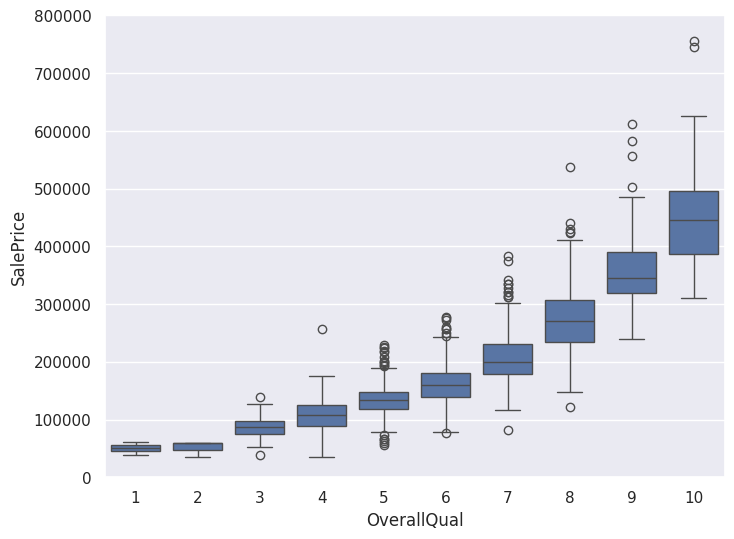

In [186]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

**Insight:**

Just as a discerning individual appreciates quality in various aspects of life, 'SalePrice' similarly favors properties with higher 'OverallQual'.

**Sale Price relationship with categorical features**

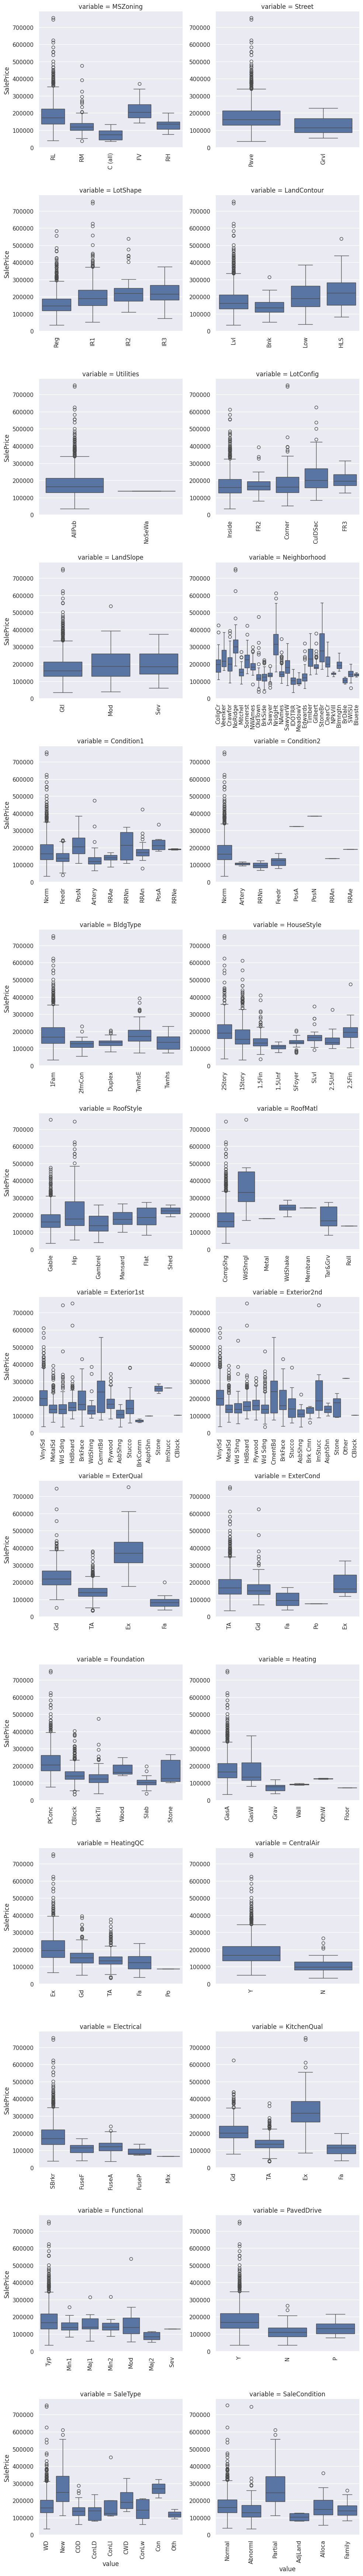

In [187]:
# Step 1: Convert categorical columns to categorical data type
for c in train.select_dtypes(include='object'):
    train[c] = train[c].astype('category')

# Step 2: Define a function for boxplot
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90)

# Step 3: Reshape the DataFrame for plotting, excluding NaN values
f = pd.melt(train.dropna(subset=train.select_dtypes(include='category').columns), id_vars=['SalePrice'], value_vars=train.select_dtypes(include='category'))

# Step 4: Create a FacetGrid for plotting
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, height=5)

# Step 5: Map the boxplot function to each combination of variable and 'SalePrice'
g = g.map(boxplot, "value", "SalePrice")

# Show the plots
plt.show()


**Insight:**

Some categories seem to more diverse with respect to SalePrice than others. Neighborhood has big impact on house prices. Most expensive seems to be Partial SaleCondition. Having pool on property seems to improve price substantially. There are also differences in variabilities between category values.

